In [ ]:
!pip install qiskit pylatexenc

In [ ]:
!pip install qiskit-aer

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import random
import numpy as np
from qiskit.result import marginal_counts

In [ ]:
def create_registers():
    alice_q = QuantumRegister(1, 'alice (q)')
    peter_alice_q = QuantumRegister(1, 'peter/alice (q)')
    peter_bob_q = QuantumRegister(1, 'peter/bob (q)')
    bob_c = ClassicalRegister(3, 'bob (c)')
    circ = QuantumCircuit(alice_q, peter_alice_q, peter_bob_q, bob_c)
    return circ

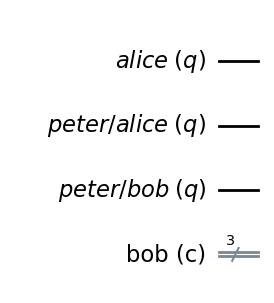

In [ ]:
create_registers().draw(output='mpl')

In [ ]:
def generate_amplitudes():
    alpha = np.sqrt(random.uniform(0, 1))
    beta = np.sqrt(1 - alpha**2)
    return alpha, beta

In [ ]:
generate_amplitudes()

(np.float64(0.4302697333384146), np.float64(0.9027003692105645))

In [ ]:
def add_gates(circ, alpha, beta):
    circ.initialize([alpha, beta], 0)
    circ.barrier()
    circ.h(1)
    circ.cx(1, 2)
    circ.barrier()
    circ.cx(0, 1)
    circ.h(0)
    circ.barrier()
    circ.measure(0, 0)
    circ.measure(1, 1)
    with circ.if_test((1, 1)):
        circ.x(2)
    with circ.if_test((0, 1)):
        circ.z(2)
    circ.measure(2, 2)
    return circ

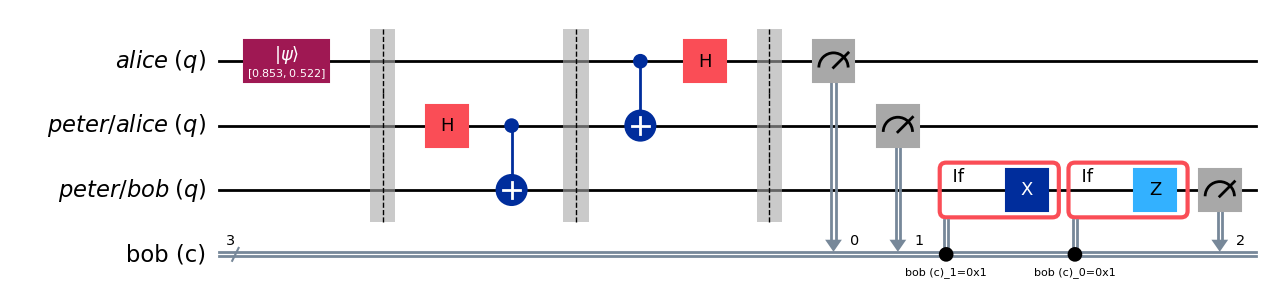

In [ ]:
(a, b) = generate_amplitudes()
circ = add_gates(create_registers(), a, b)
circ.draw(output='mpl')

In [ ]:
from qiskit_aer import AerSimulator
device = AerSimulator() # Aer.get_backend("qasm_simulator")

shots = 1000
job = device.run(circ, shots=shots)
print(job.job_id())

result = job.result()
counts = result.get_counts(circ)
counts_m = marginal_counts(counts, [2])
number_of_0s = counts_m.get('0')
number_of_1s = counts_m.get('1')
alpha = np.sqrt(number_of_0s / shots)
beta = np.sqrt(number_of_1s / shots)
print("|\u03C8\u27E9 ({:.4f}, {:.4f})".format(alpha, beta))

933ed6ea-7a47-40c5-a66e-5679db0be851
|ψ⟩ (0.8579, 0.5138)
